In [34]:
## caged_brach
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import geopandas as gpd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 1999
pd.options.display.max_colwidth = 200


import basedosdados as bd
import plotly.express as px

In [24]:
df = pd.read_csv('../data/radiology/data.csv')
df['volume'] = df['volume'].astype(float)
df['dose'] = df['dose'].astype(float)
df['ROI'] = df['roi']
df = df.sort_values(by=['roi','bin'])


colors = {
 'CTV CENTRAL CT1':'violet', # a definir
 'CTV CENTRAL CT2':'darkviolet',
          
 'CTV CT1':"tomato", #vermelho
 'CTV CT2': "#B50000",
          
 'PULMAO ESQUERDO CT1':"lightgreen", #verde
 'PULMAO ESQUERDO CT2': "darkgreen",
          
 'PULMAO DIREITO CT1':'deepskyblue', # azul
 'PULMAO DIREITO CT2':"darkblue",

}

legend_order = [
    'CTV CT1',
    'CTV CT2',
    'CTV CENTRAL CT1',
    'CTV CENTRAL CT2',
    'PULMAO DIREITO CT1',
    'PULMAO DIREITO CT2',
    'PULMAO ESQUERDO CT1',
    'PULMAO ESQUERDO CT2'
]

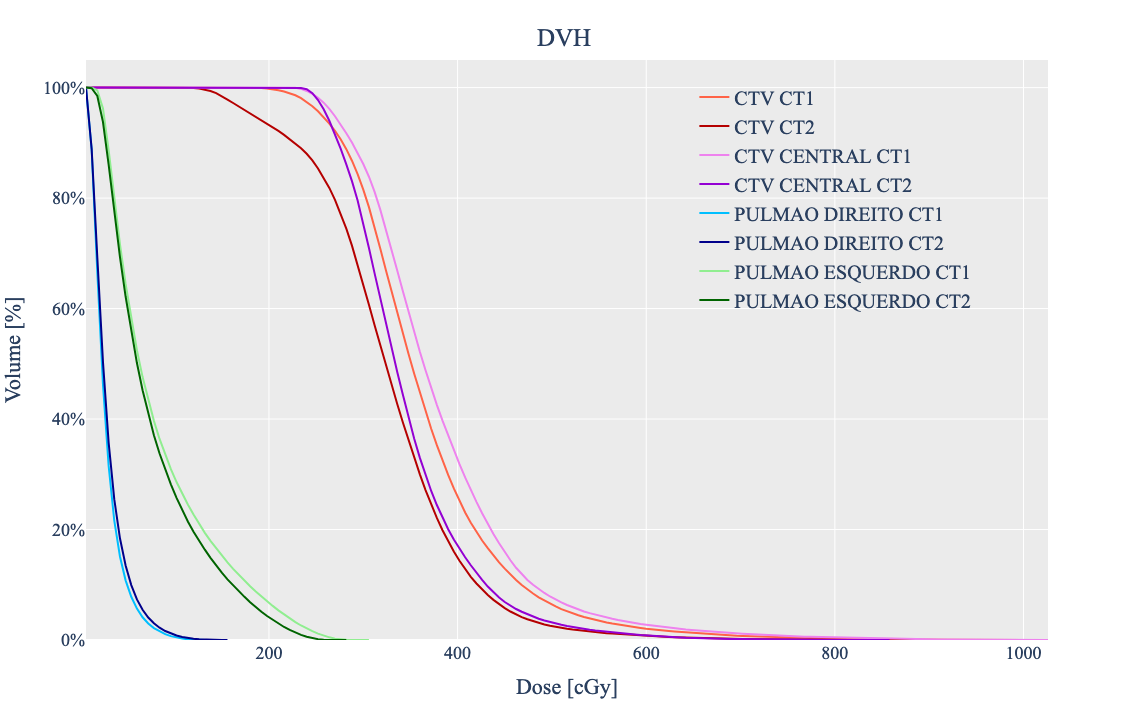

In [33]:
def get_layout(fig, title):

    return fig.update_layout(
        title=title,
        title_x=0.5,
        title_y=0.96,
        # hovermode= 'x', #"x unified",
        height=720,
        # width=920,
        font=dict(
            family="Ubuntu",
            size=18,
        ),
        plot_bgcolor="#ebebeb",
        legend=dict(
            x=0.78,
            y=0.97,
            xanchor="center",
            yanchor="top",
            bgcolor="rgba(0, 0, 0, 0)",
            font=dict(size=20),
            title = ''
        ),
    )



fig = px.line(
    df,
    x="dose",
    y="volume",
    color='ROI',
    # hover_name="tile_id",
    labels={
        "dose": f"Dose [cGy]",
        "volume": f"Volume [%]",
    },
    color_discrete_map=colors,
    category_orders = {'ROI':legend_order},
    
)


fig = get_layout(fig, title=f"DVH")
fig.update_yaxes(ticksuffix="%", showgrid=True)  # the y-axis is in dollars
fig.update_traces(line=dict(width=2))
fig.update(layout_yaxis_range = [0,105])
# fig.update_xaxes(
#         title_standoff = 35)

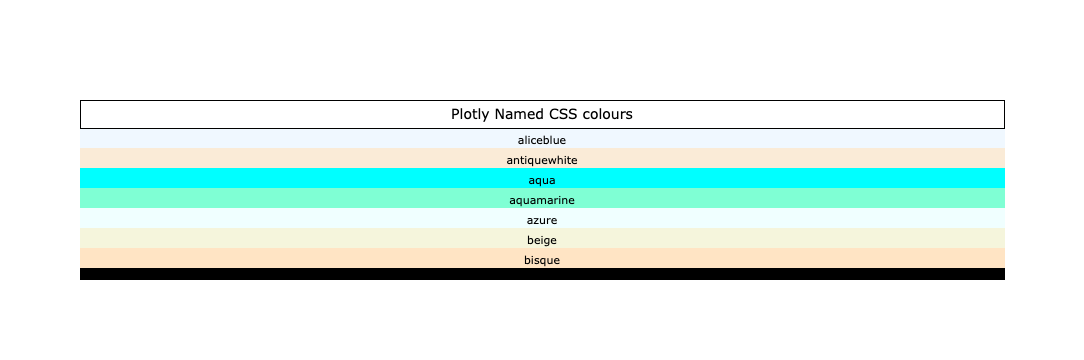

In [16]:
show_named_plotly_colours()

In [15]:
def show_named_plotly_colours():
    """
    function to display to user the colours to match plotly's named
    css colours.

    Reference:
        #https://community.plotly.com/t/plotly-colours-list/11730/3

    Returns:
        plotly dataframe with cell colour to match named colour name

    """
    s='''
        aliceblue, antiquewhite, aqua, aquamarine, azure,
        beige, bisque, black, blanchedalmond, blue,
        blueviolet, brown, burlywood, cadetblue,
        chartreuse, chocolate, coral, cornflowerblue,
        cornsilk, crimson, cyan, darkblue, darkcyan,
        darkgoldenrod, darkgray, darkgrey, darkgreen,
        darkkhaki, darkmagenta, darkolivegreen, darkorange,
        darkorchid, darkred, darksalmon, darkseagreen,
        darkslateblue, darkslategray, darkslategrey,
        darkturquoise, darkviolet, deeppink, deepskyblue,
        dimgray, dimgrey, dodgerblue, firebrick,
        floralwhite, forestgreen, fuchsia, gainsboro,
        ghostwhite, gold, goldenrod, gray, grey, green,
        greenyellow, honeydew, hotpink, indianred, indigo,
        ivory, khaki, lavender, lavenderblush, lawngreen,
        lemonchiffon, lightblue, lightcoral, lightcyan,
        lightgoldenrodyellow, lightgray, lightgrey,
        lightgreen, lightpink, lightsalmon, lightseagreen,
        lightskyblue, lightslategray, lightslategrey,
        lightsteelblue, lightyellow, lime, limegreen,
        linen, magenta, maroon, mediumaquamarine,
        mediumblue, mediumorchid, mediumpurple,
        mediumseagreen, mediumslateblue, mediumspringgreen,
        mediumturquoise, mediumvioletred, midnightblue,
        mintcream, mistyrose, moccasin, navajowhite, navy,
        oldlace, olive, olivedrab, orange, orangered,
        orchid, palegoldenrod, palegreen, paleturquoise,
        palevioletred, papayawhip, peachpuff, peru, pink,
        plum, powderblue, purple, red, rosybrown,
        royalblue, saddlebrown, salmon, sandybrown,
        seagreen, seashell, sienna, silver, skyblue,
        slateblue, slategray, slategrey, snow, springgreen,
        steelblue, tan, teal, thistle, tomato, turquoise,
        violet, wheat, white, whitesmoke, yellow,
        yellowgreen
        '''
    li=s.split(',')
    li=[l.replace('\n','') for l in li]
    li=[l.replace(' ','') for l in li]

    import pandas as pd
    import plotly.graph_objects as go

    df=pd.DataFrame.from_dict({'colour': li})
    fig = go.Figure(data=[go.Table(
      header=dict(
        values=["Plotly Named CSS colours"],
        line_color='black', fill_color='white',
        align='center', font=dict(color='black', size=14)
      ),
      cells=dict(
        values=[df.colour],
        line_color=[df.colour], fill_color=[df.colour],
        align='center', font=dict(color='black', size=11)
      ))
    ])

    fig.show()